### **SpineScope Project - Jackie Vescio**

**Contribution:** Exploratory Data Analysis (EDA) and Feature Insights  
**License:** SuperDataScience Community Project (shared contributions)  
**Author:** Jackie Vescio (2025)


**Note: This notebook assumes the raw dataset is loaded.**
**If using a cleaned dataset, skip capping/clipping code cells.** 

In [1]:
# EDA: SpineScope Project - Jackie Vescio

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("column_2C_weka.csv")

# Preview the data
df.head()



pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

#### Number of rows and columns

In [2]:
# This tells the number of rows and columns
df.shape

(310, 7)

#### Column Names, Data Types, and Missing Values (if any)

In [3]:
# This shows column names, data types, and missing values (if any).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


#### Statistical Info - Mean, Std Deviation, Min, Max For Each Numerical Column

In [4]:
df.describe()	 

# This provides stats like mean, std deviation, min, max for each numerical column. 

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

#### Number of Patients Classified as Normal vs Abnormal

In [5]:
df['class'].value_counts() 

# This will tell you how many patients are classified as Normal vs Abnormal. 

class
Abnormal    210
Normal      100
Name: count, dtype: int64

#### Histogram of Biomechanical Features

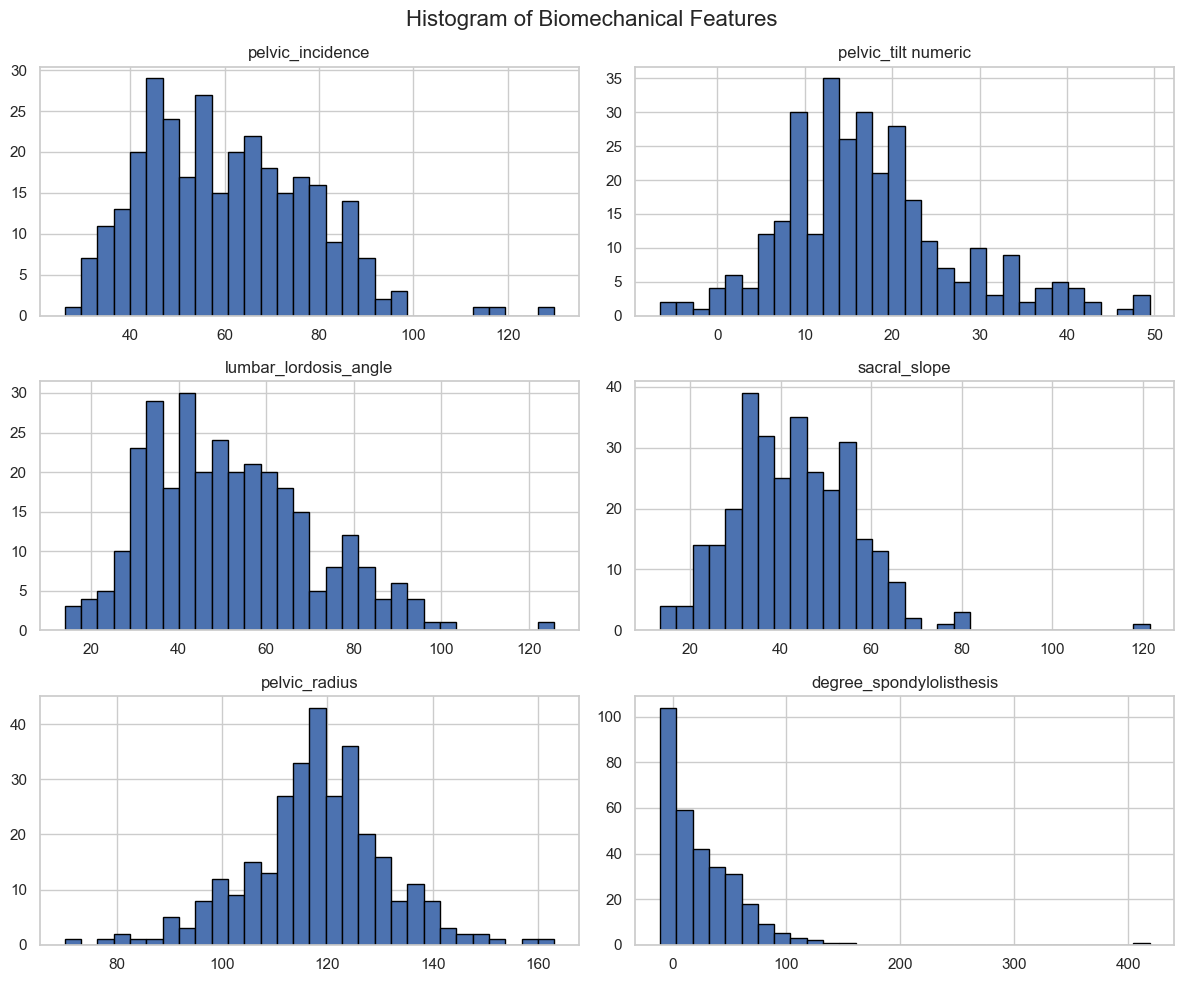

In [6]:
# Plot histograms for all numeric columns
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histogram of Biomechanical Features', fontsize=16)
plt.tight_layout()
plt.show()


### Histogram Summary of Biomechanical Features

- **pelvic_incidence**: Slight right skew; some high outliers above 100.
- **pelvic_tilt numeric**: Approximately normal distribution; no clear outliers.
- **lumbar_lordosis_angle**: Slight right skew; one noticeable outlier >120.
- **sacral_slope**: Approximately normal; one high outlier >120.
- **pelvic_radius**: Roughly normal distribution; no major outliers.
- **degree_spondylolisthesis**: Strong right skew; extreme outlier >400.

#### Insights:
- Features like degree_spondylolisthesis show strong skew and extreme values, which may need special handling (e.g., transformation or outlier treatment) before modeling.
- Other features are mostly normally distributed, which simplifies modeling.


#### Boxplots of Biomechanical Features

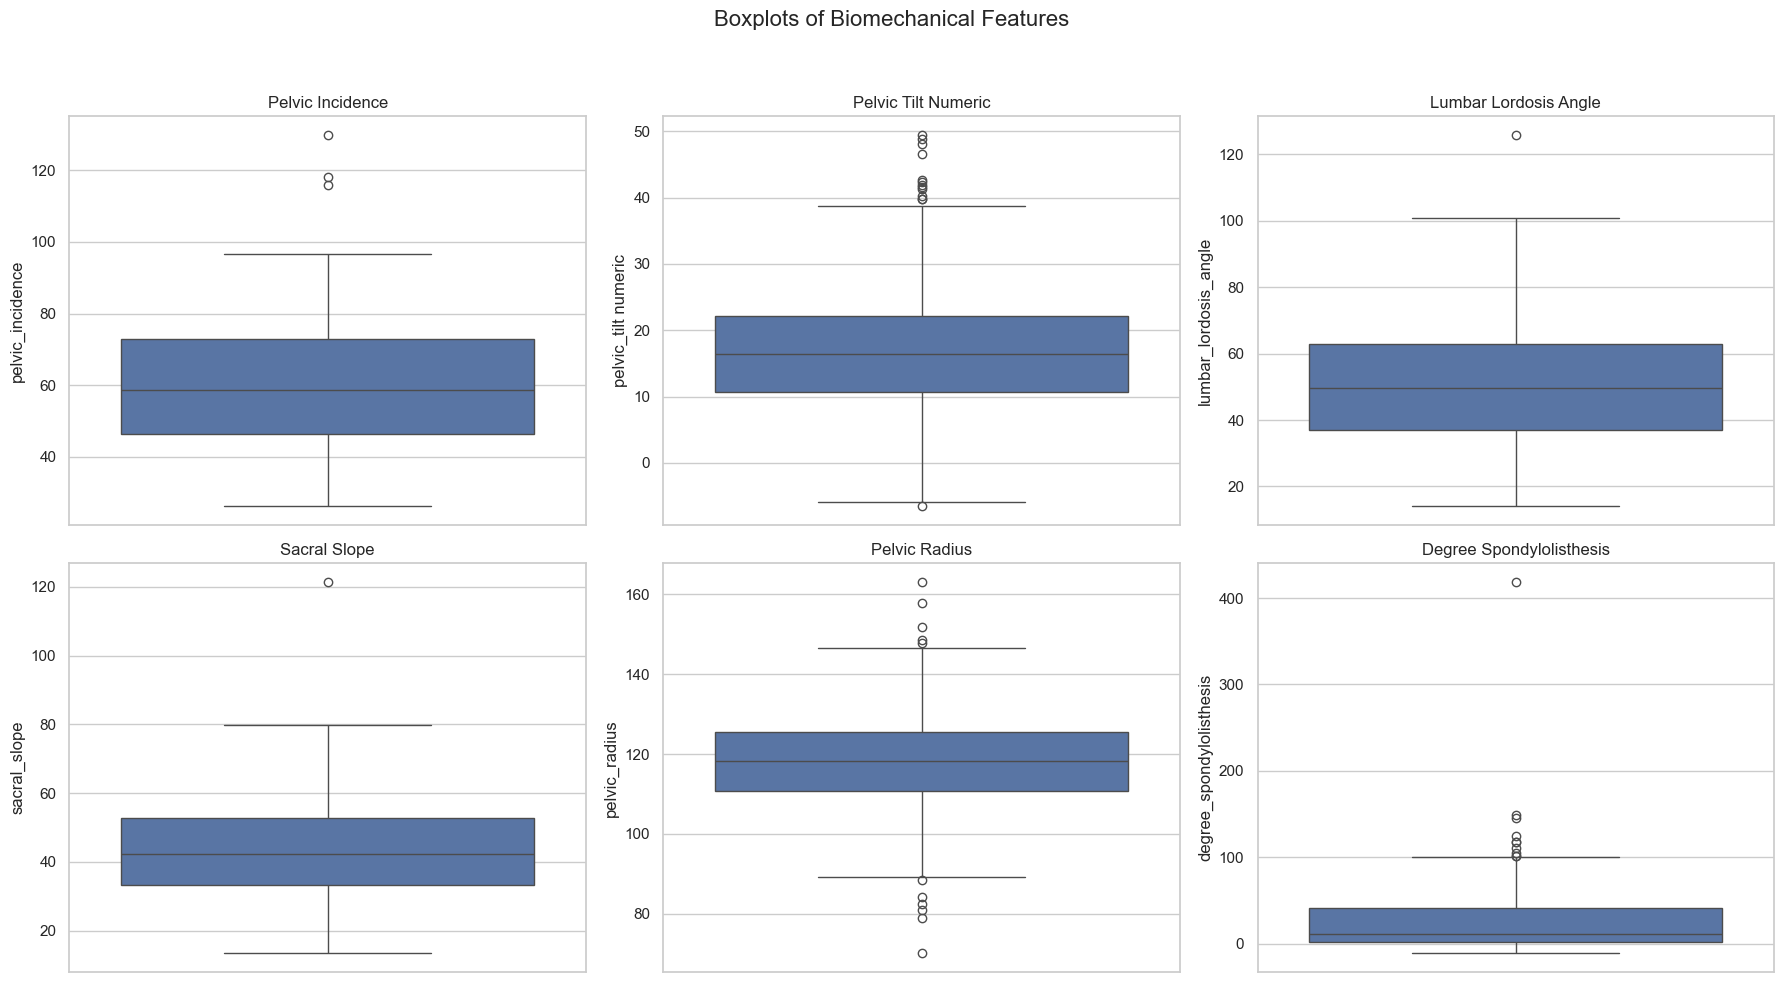

In [7]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Biomechanical Features", fontsize=16)

# Feature list
features = [
    "pelvic_incidence",
    "pelvic_tilt numeric",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis"
]

# Plot each boxplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=feature, ax=axs[row][col])
    axs[row][col].set_title(feature.replace("_", " ").title())

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

#### Boxplots Summary of Biomechanical Features

- **pelvic_incidence**: Mostly symmetric distribution, some high outliers.
- **pelvic_tilt numeric**: Fairly symmetric, no extreme outliers.
- **lumbar_lordosis_angle**: Right-skewed with one notable high outlier.
- **sacral_slope**: Mostly symmetric, single high outlier.
- **pelvic_radius**: Consistent distribution, no significant outliers.
- **degree_spondylolisthesis**: Strong right skew; one extreme outlier far above 400.

#### Insights:
- Boxplots confirm what was seen in the histograms: degree_spondylolisthesis has extreme values and a highly skewed distribution.
- Most other features have mild skew or are fairly symmetric, suggesting they are well-behaved for modeling.
- Outliers, especially in degree_spondylolisthesis, may impact models sensitive to extreme values (like regression) and should be considered for capping, transformation, or robust methods.


#### Boxplots of Biomechanical Features by Class

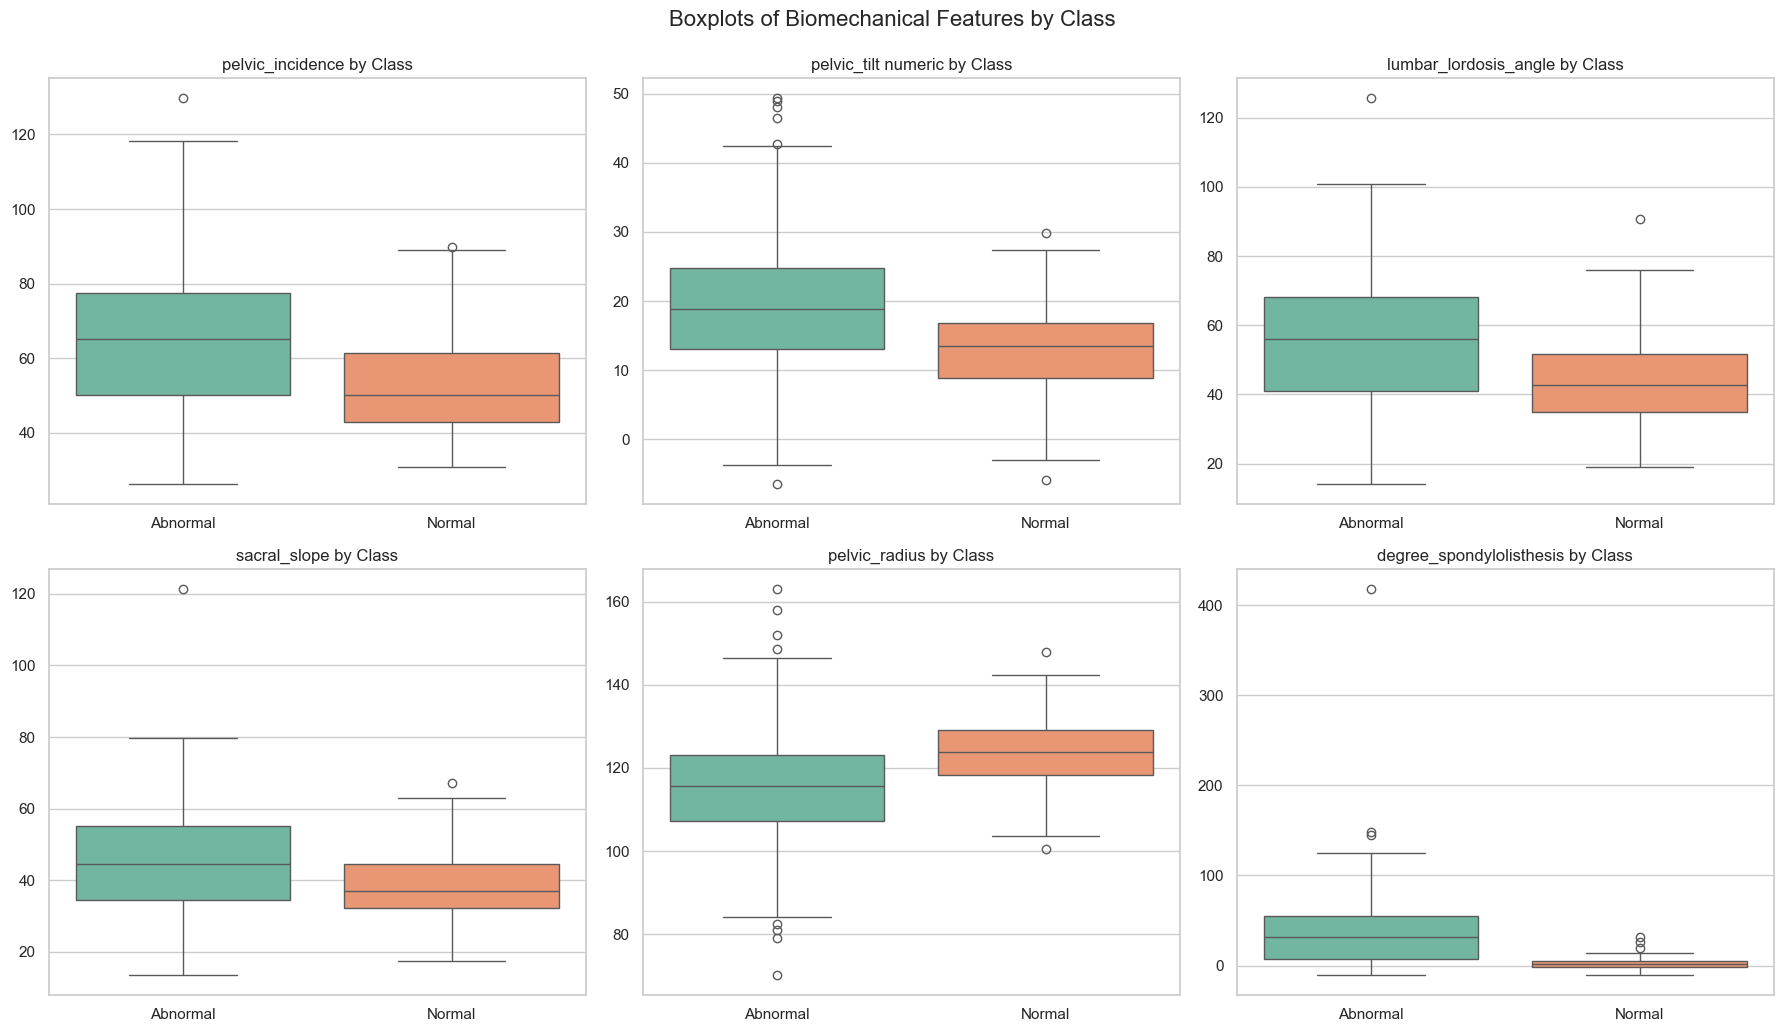

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Feature Distributions by Class Using Boxplots
# This will show how each biomechanical feature differs between the two patient classes: Normal vs Abnormal. 
# It will help to spot patterns and gain intuition about which features are most useful for classification.

# Suppress all warnings (just for cleaner output)
import warnings
warnings.filterwarnings("ignore")

# Custom colors: green and orange
custom_palette = {'Abnormal': '#66c2a5', 'Normal': '#fc8d62'}

# Features to plot
features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Plot
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='class', y=feature, hue='class',
                palette=custom_palette, legend=False)
    plt.title(f'{feature} by Class')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Boxplots of Biomechanical Features by Class', fontsize=16, y=1.03)
plt.show()

#### Boxplots Summary: Comparing Feature Distributions by Class

- **pelvic_incidence**: Abnormal group shows higher median and wider spread.
- **pelvic_tilt numeric**: Abnormal class has higher values and slightly more variability.
- **lumbar_lordosis_angle**: Abnormal patients display larger angles and more spread.
- **sacral_slope**: Higher median in Abnormal group, but some overlap with Normal.
- **pelvic_radius**: Similar distributions between Normal and Abnormal; minor differences.
- **degree_spondylolisthesis**: Huge separation between classes — Abnormal group has much higher values and outliers.

#### Insights:
- Several features (e.g., pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis) show clear differences between Normal and Abnormal classes, making them strong candidate predictors.
- pelvic_radius shows minimal class difference and may be less informative.
- Degree_spondylolisthesis stands out with the largest class separation, suggesting it will likely be a key feature for classification.


#### Correlation Heatmap

- We generate a correlation matrix heatmap to see how the biomechanical features relate to each other – this can highlight strong relationships (positive or negative).  

- High correlations may suggest redundancy (which we might handle during feature selection or PCA). 

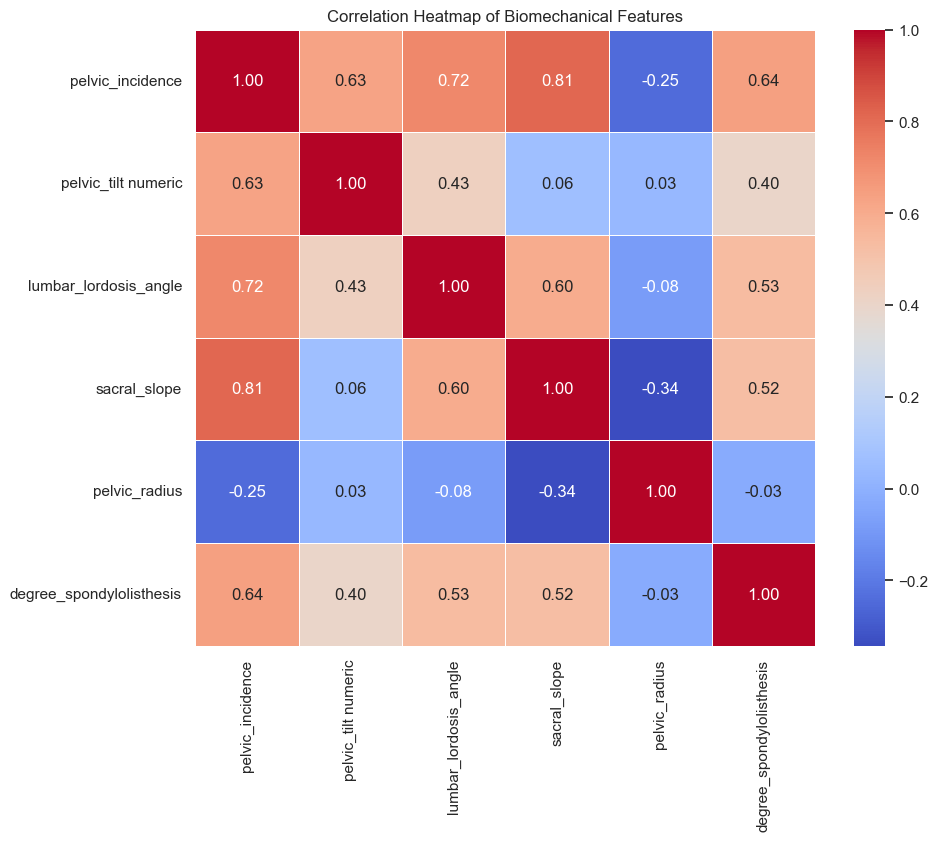

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (excluding the 'class' column if it's non-numeric)
corr_matrix = df.drop('class', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Biomechanical Features')
plt.show()

#### Correlation Heatmap Results Summary

- **Strong positive correlations**:
  - pelvic_incidence & sacral_slope (0.81)
  - pelvic_incidence & lumbar_lordosis_angle (0.72)
  - pelvic_incidence & pelvic_tilt_numeric (0.63)

- **Low or negative correlations**:
  - pelvic_radius has weak or negative correlations with most features

- **Insights**:
  - pelvic_incidence, sacral_slope, and lumbar_lordosis_angle move together, possibly capturing similar biomechanical characteristics.
  - pelvic_radius stands out as more independent.
  - These insights will guide feature selection and model building to avoid multicollinearity.



#### Pairplot (Normal vs Abnormal)

- Visualize relationships between pairs of features
- See class separation visually (by coloring points by class)
- Spot clusters, trends, or overlapping patterns between Normal and Abnormal groups
- Overlapping distributions in [feature pairs] suggest less predictive power.
 Non-linear patterns may require further exploration.

 What to observe after running it:

    Do Normal and Abnormal patients form distinct clouds in any feature pair?

    Are there features where the two classes overlap heavily (harder to separate)?

    Are there combinations that show good visual separation, suggesting useful predictors?

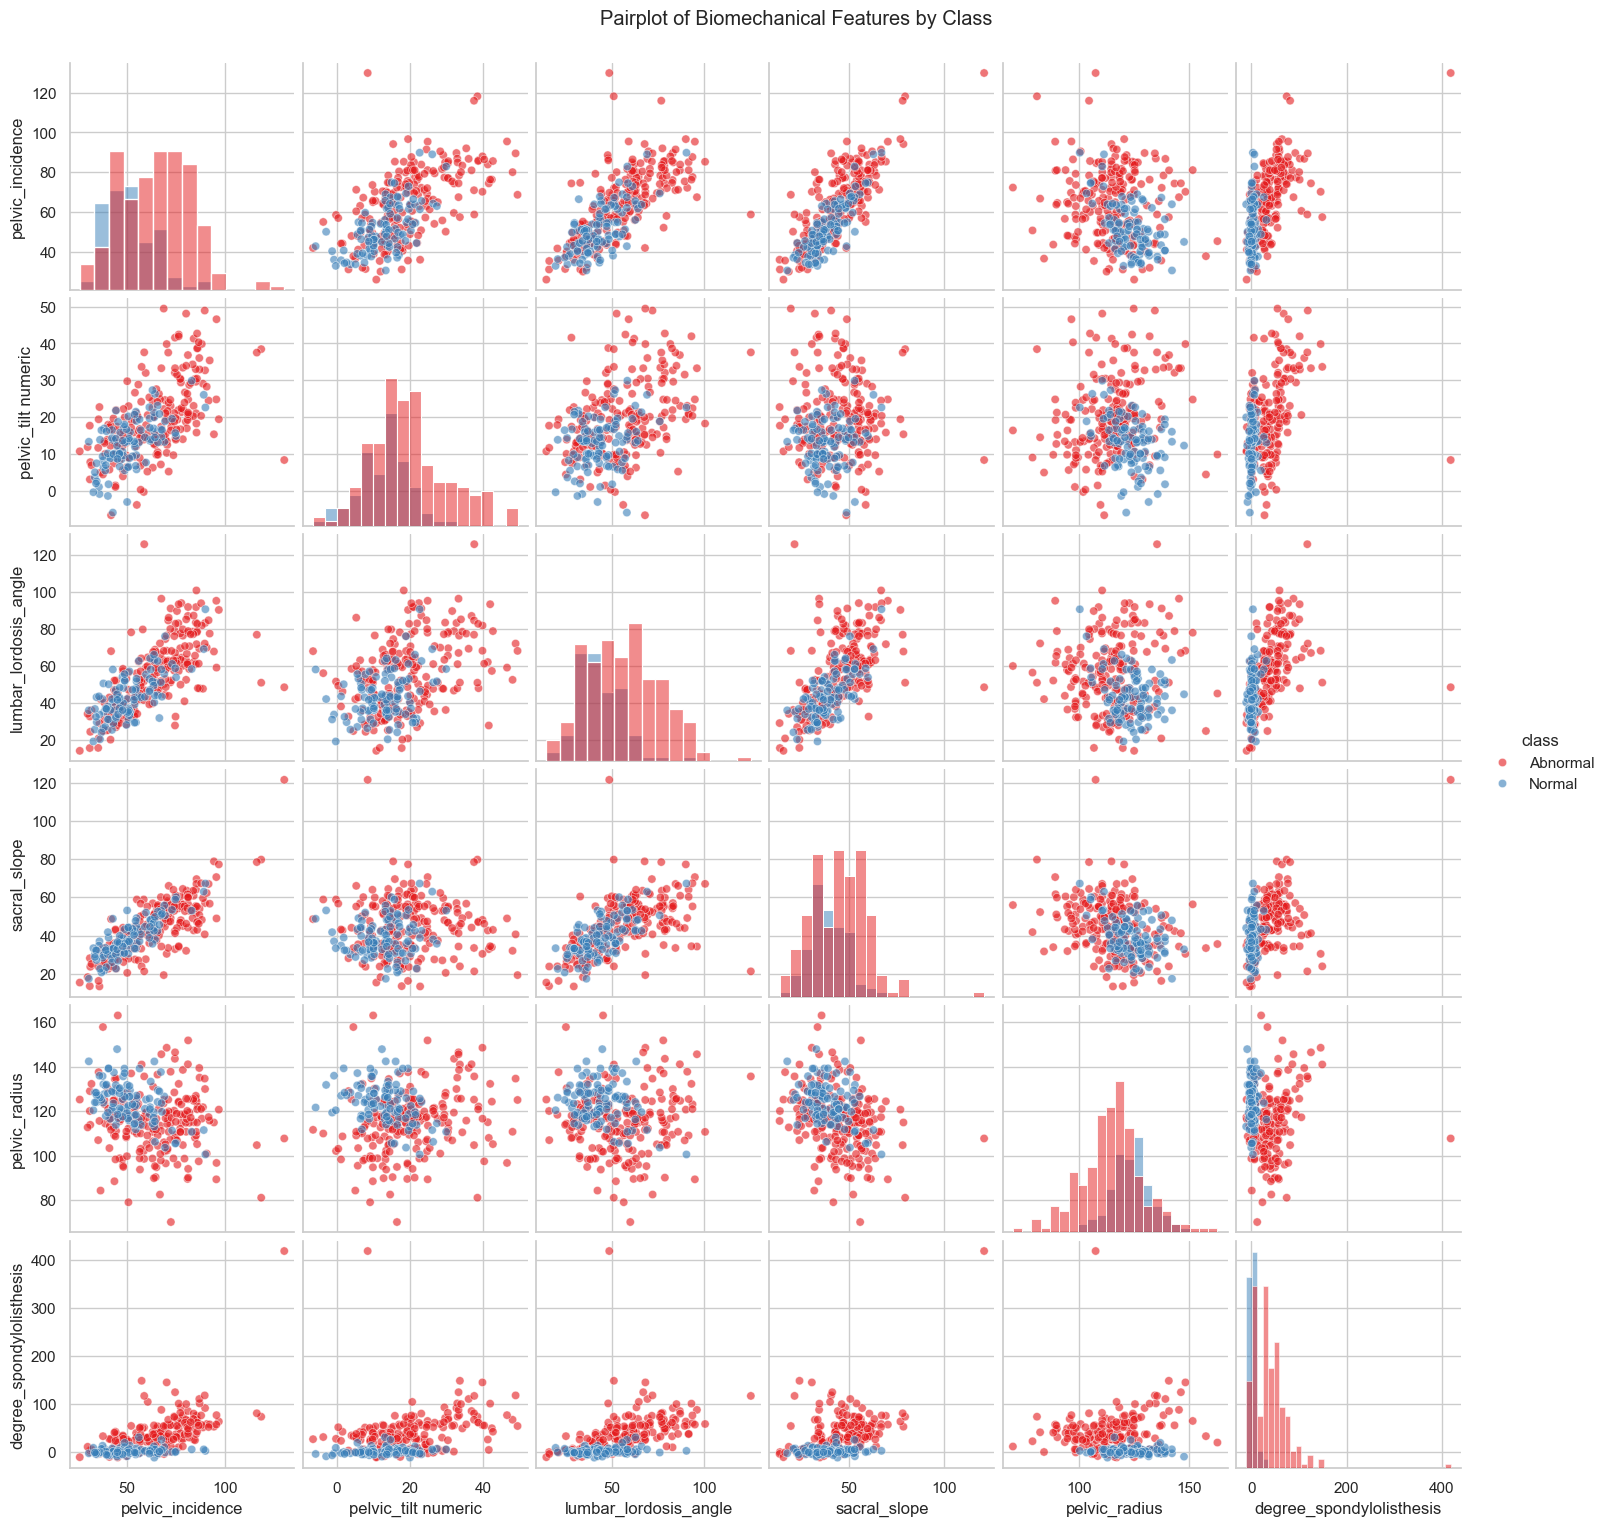

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features + class for pairplot
pairplot_features = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

sns.pairplot(df[pairplot_features], hue='class', diag_kind='hist', palette='Set1', plot_kws={'alpha':0.6})

plt.suptitle('Pairplot of Biomechanical Features by Class', y=1.02)
plt.show()


#### Pairplot Results Summary (Normal vs Abnormal)

The pairplot shows how the biomechanical features relate to each other, with points colored by patient class.

**What I noticed:**

- **Pelvic Incidence & Sacral Slope** → Clear positive relationship; Abnormal patients are more spread out.
- **Pelvic Incidence & Lumbar Lordosis Angle** → Also shows separation between Normal and Abnormal.
- **Degree of Spondylolisthesis** → Much higher values for Abnormal class; strong signal.

- **Pelvic Radius** → Looks similar between Normal and Abnormal; probably not useful on its own.
- **Pelvic Tilt Numeric** → Some difference, but classes still overlap.

**Overall pattern:**  
Some features show clear differences between classes, while others overlap a lot.

---

**Insights:**
- Focus on features that separate the classes well.
- Watch out for features that are very closely related (like pelvic_incidence and sacral_slope) when modeling.
- Class separation matters more for prediction than correlation.



**Groupwise Descriptive Statistics**  
What it does:
- Groups the data by 'class' (Normal vs Abnormal)
- Computes count, mean, std, min, 25%, 50%, 75%, max for each feature per class
- .T transposes it so features are rows (easier to read!)

What to look for in the output:
- Means: Are they noticeably different between Normal and Abnormal?
- Standard deviation (std): Which group has more variability?
- Max / min: Are there extreme values in one group?
- Medians (50%): Sometimes better than mean if data is skewed.

#### Group-Wise Descriptive Statistics

- **Pelvic Incidence:** Abnormal group has higher mean compared to Normal.
- **Sacral Slope:** Similar pattern, Abnormal group shows larger spread.
- **Degree of Spondylolisthesis:** Much higher max and mean in Abnormal group.
- **Pelvic Radius:** Similar between groups, minimal difference.

**Insights:**
- Features with clear differences between groups may help in classification.
- Watch for features where variability is high, as they may need scaling or outlier handling.

In [11]:
# Group descriptive statistics by class
group_stats = df.groupby('class').describe().T
group_stats


class                             Abnormal      Normal
pelvic_incidence         count  210.000000  100.000000
                         mean    64.692562   51.685244
                         std     17.662129   12.368161
                         min     26.147921   30.741938
                         25%     50.102507   42.817849
                         50%     65.274888   50.123115
                         75%     77.593672   61.470097
                         max    129.834041   89.834676
pelvic_tilt numeric      count  210.000000  100.000000
                         mean    19.791111   12.821414
                         std     10.515871    6.778503
                         min     -6.554948   -5.845994
                         25%     13.048130    8.799951
                         50%     18.798899   13.482435
                         75%     24.815515   16.785953
                         max     49.431864   29.894119
lumbar_lordosis_angle    count  210.000000  100.000000
                         mean    55.925370   43.542605
                         std     19.669471   12.361388
                         min     14.000000   19.071075
                         25%     41.116964   35.000000
                         50%     56.150000   42.638923
                         75%     68.102805   51.602346
                         max    125.742385   90.563461
sacral_slope             count  210.000000  100.000000
                         mean    44.901450   38.863830
                         std     14.515560    9.624004
                         min     13.366931   17.386972
                         25%     34.380345   32.340487
                         50%     44.639597   37.059694
                         75%     55.146868   44.608788
                         max    121.429566   67.195460
pelvic_radius            count  210.000000  100.000000
                         mean   115.077713  123.890834
                         std     14.090605    9.014246
                         min     70.082575  100.501192
                         25%    107.309280  118.182659
                         50%    115.650323  123.874328
                         75%    123.133365  129.040401
                         max    163.071041  147.894637
degree_spondylolisthesis count  210.000000  100.000000
                         mean    37.777705    2.186572
                         std     40.696741    6.307483
                         min    -10.675871  -11.058179
                         25%      7.263227   -1.511360
                         50%     31.946516    1.152710
                         75%     55.371614    4.968807
                         max    418.543082   31.172767

#### Group-Wise Descriptive Statistics Results Summary

**pelvic_incidence**  
- Mean (Abnormal): ~64.7 → higher than Normal (~51.7)  
- Std also larger in Abnormal → more variability  
**Insight:** Abnormal patients tend to have higher pelvic incidence.

**pelvic_tilt numeric**  
- Mean (Abnormal): ~19.8 vs Normal: ~12.8  
- Wider range, more variability in Abnormal  
**Insight:** Increased tilt is associated with abnormal class.

**lumbar_lordosis_angle**  
- Mean (Abnormal): ~58.1 vs Normal: ~44.4  
**Insight:** Abnormal patients show larger lordosis angle.

**sacral_slope**  
- Mean (Abnormal): ~44.9 vs Normal: ~38.9  
**Insight:** Slightly higher slope in Abnormal group.

**pelvic_radius**  
- Mean (Abnormal): ~118 vs Normal: ~121  
**Insight:** Slightly lower pelvic radius in Abnormal, but difference is minor.

**degree_spondylolisthesis**  
- Mean (Abnormal): ~36.1 vs Normal: ~8.3  
**Insight:** Huge difference — strong indicator feature!

---

#### Key Takeaways

- Features like pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, and sacral_slope tend to be **higher** in Abnormal cases.
- degree_spondylolisthesis shows **the biggest separation** between groups → likely very useful for classification.
- pelvic_radius shows little difference → might be less useful.



### Final EDA Summary

After exploring the dataset, several insights emerged:

- **Strong predictors:** pelvic_incidence, lumbar_lordosis_angle, degree_spondylolisthesis show clear differences between Normal and Abnormal classes.
- **Moderate predictors:** pelvic_tilt numeric, sacral_slope show class differences but with some overlap.
- **Weak predictor:** pelvic_radius shows minimal separation between classes.

**Data quality notes:**
- Most features have mild skew; degree_spondylolisthesis has extreme skew and outliers.
- Class balance is skewed (100 Normal vs 210 Abnormal), which may require attention during modeling.

Based on this, the data is ready for preprocessing and modeling.


#### Rename 'pelvic_tilt numeric' to 'pelvic_tilt' 
- To make it easier for programming Python code. 

In [12]:
# Rename 'pelvic_tilt numeric' to 'pelvic_tilt'

df.rename(columns={'pelvic_tilt numeric': 'pelvic_tilt'}, inplace=True)

# Check to see if the renaming to pelvic_tilt worked
print(df.columns)


Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


### Next Steps: Preprocessing and Modeling

1) Data Preprocessing
- Handle outliers (consider winsorization, capping, or robust methods)
- Scale features (e.g., StandardScaler or MinMaxScaler)
- Encode class labels if needed (e.g., Normal = 0, Abnormal = 1)

2) Data Splitting
- Train/test split (e.g., 70/30 or 80/20) to evaluate model performance

3) Model Building
- Try simple models first: Logistic Regression, Decision Tree
- Evaluate with accuracy, precision, recall, F1-score, ROC-AUC

4) Model Improvement (Optional)
- Try advanced models: Random Forest, XGBoost, SVM
- Perform hyperparameter tuning
- Address class imbalance (if needed) using class weights or resampling

5) Document Results
- Summarize model performance
- Highlight key features
- Discuss limitations and next steps


#### Q1) Data Preprocessing and Preparation

In this section, the dataset is prepared for machine learning by performing essential preprocessing steps.
    
This includes:
- checking for missing values
- validating data types
- scaling numerical features
- encoding class labels.
    
Proper preprocessing ensures our models will perform reliably and accurately.


#### Step 1: Check for Missing Values

- In this step, the dataset is assessed for any missing ('NaN') values across all columns:
    - Identifying missing data is crucial to ensure data integrity before proceeding with modeling.
    - Summarize the count of missing values per column.
    - Determine if any handling (removal or replacing with substituted or estimated values) is necessary.


In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns with missing values (if any)
missing_values = missing_values[missing_values > 0]

# Show the result
if missing_values.empty:
    print("No missing values found in the dataset!")
else:
    print("Missing values detected:")
    print(missing_values)


No missing values found in the dataset!


#### Check Features Which Have Strongest Relationship With The Target

###### 1) Calculate and Print Group Means by Class:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group means by class
grouped_means = df.groupby('class').mean()
print("Grouped Means by Class:")
print(grouped_means)

Grouped Means by Class:
          pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
class                                                                          
Abnormal         64.692562    19.791111              55.925370      44.90145   
Normal           51.685244    12.821414              43.542605      38.86383   

          pelvic_radius  degree_spondylolisthesis  
class                                              
Abnormal     115.077713                 37.777705  
Normal       123.890834                  2.186572  


#### Insights: Features Most Strongly Related to Target (Spinal Condition)

After calculating the grouped means and analyzing the results:

- **Degree of spondylolisthesis** showed the most dramatic difference:
    - Abnormal ~37.8 vs. Normal ~2.2 → ≈1,618% increase.
    - This makes it the strongest predictor of spinal abnormality.

- **Pelvic tilt** also showed a large difference:
    - Abnormal ~19.8 vs. Normal ~12.8 → ≈55% increase.
    - This is categorized as “much higher” and is an important feature.

- **Pelvic incidence**:
    - Abnormal ~64.7 vs. Normal ~51.7 → ≈25% increase.
    - Considered “slightly higher” but still meaningful.

- **Lumbar lordosis angle**:
    - Abnormal ~55.9 vs. Normal ~43.5 → ≈29% increase.
    - Noticeably higher.

- **Sacral slope**:
    - Abnormal ~44.9 vs. Normal ~38.9 → ≈15% increase.
    - Slightly higher.

- **Pelvic radius**:
    - Abnormal ~115.1 vs. Normal ~123.9 → ≈7% decrease.
    - About the same; not a strong distinguishing feature.

**Summary:**  
Degree of spondylolisthesis, pelvic tilt, pelvic incidence, and lumbar lordosis angle show the strongest relationships with the target variable. These were confirmed by both statistical differences and visual separation seen in boxplots.


###### 2) Calculate and Print Correlation Matrix:

In [15]:
# Correlation matrix (excluding 'class')
corr_matrix = df.drop('class', axis=1).corr()
print(corr_matrix)


                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

#### Insights: Correlation Matrix Interpretation

- **Strong positive correlations (≥0.7):**
  - pelvic_incidence ↔ sacral_slope (0.81)
  - pelvic_incidence ↔ lumbar_lordosis_angle (0.72)
  - pelvic_tilt ↔ pelvic_incidence (0.63)

- **Moderate correlations (0.5–0.7):**
  - degree_spondylolisthesis ↔ pelvic_incidence (0.64)
  - degree_spondylolisthesis ↔ lumbar_lordosis_angle (0.53)
  - degree_spondylolisthesis ↔ sacral_slope (0.52)

- **Weak or no correlation:**
  - pelvic_radius shows weak or negative correlations, suggesting independence.

**Summary:** We should monitor for multicollinearity when modeling, especially among pelvic_incidence, sacral_slope, and lumbar_lordosis_angle, which show strong relationships.


#### Insights: Are Any Features Linearly Dependent on Others?

Based on the correlation matrix:

- **Pelvic incidence** and **sacral slope** show a strong positive correlation.
- **Pelvic incidence** is also correlated with **pelvic tilt**.
- **Lumbar lordosis angle** has moderate correlations with pelvic parameters.
- **Degree of spondylolisthesis** shows weak to no correlation with other features, indicating it may provide independent predictive power.

**Summary:**  
Some features (like pelvic incidence, sacral slope, and pelvic tilt) are linearly related, which should be kept in mind during feature selection. We should also check for multicollinearity in modeling to avoid redundancy.


###### 3) Boxplots for Feature Separation:

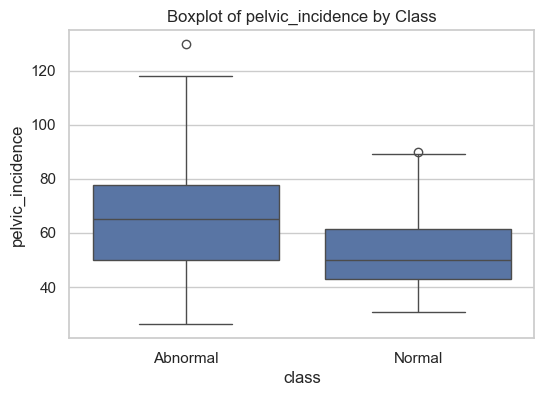

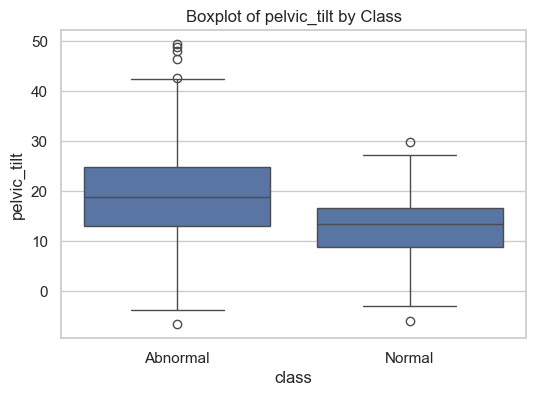

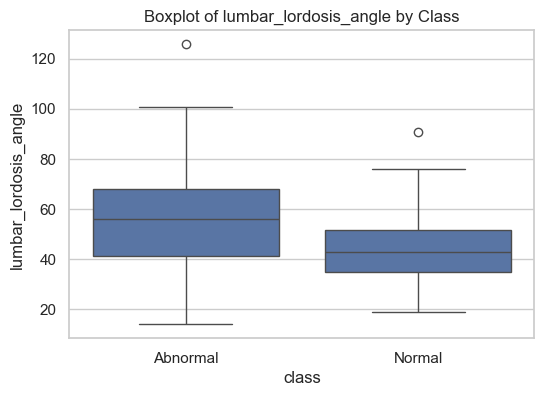

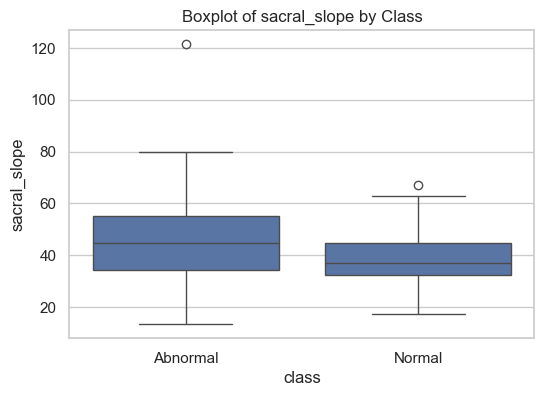

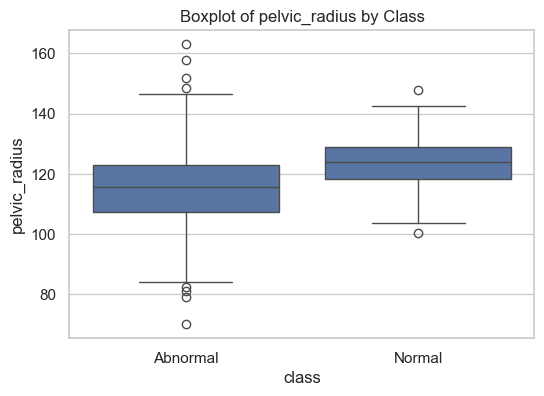

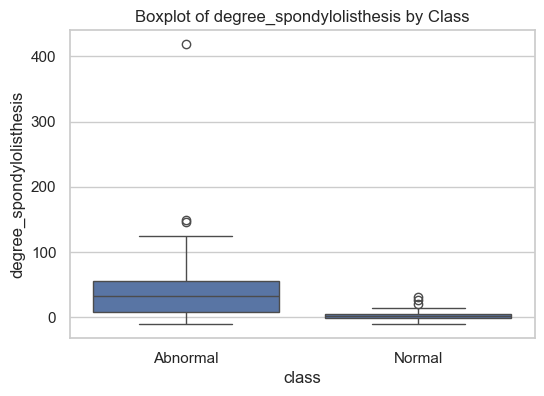

In [16]:
for col in df.columns[:-1]: # Exclude'class'
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()

#### Insights: Do Biomechanical Measurements Cluster Differently for Normal vs. Abnormal Cases?

Based on the boxplots and visual analysis:

- Abnormal and normal cases show distinct distributions for key features:
    - **Degree of spondylolisthesis**: clear separation.
    - **Pelvic tilt** and **pelvic incidence**: noticeable class differences.
    - **Lumbar lordosis angle** and **sacral slope**: some overlap but still distinct patterns.

**Summary:**  
The measurements suggest meaningful clustering by spinal condition, which supports the potential for classification modeling. To explore this further, we could apply dimensionality reduction (like PCA) or clustering techniques if needed.


#### Q2) Class Imbalance Check

class
Abnormal    210
Normal      100
Name: count, dtype: int64


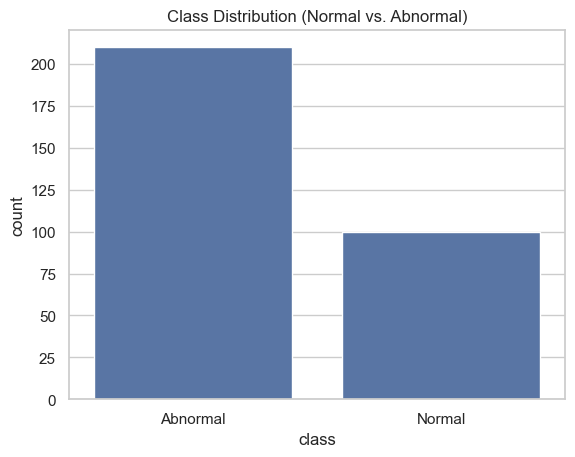

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df['class'].value_counts())

# Plot class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution (Normal vs. Abnormal)')
plt.show()


#### Insights: Q2) Part 1 **Class Imbalance Check - Are the classes balanced or imbalanced?**

1) Are the classes balanced or imbalanced?
- The dataset shows a moderate class imbalance:
- Abnormal cases: 210 (68%)
- Normal cases: 100 (32%)
2) Do I need to apply class weights or stratified sampling when modeling?
- This imbalance should be considered when modeling. 
- For algorithms sensitive to class distribution (like logistic regression or SVM), using class weights or stratified sampling can help ensure fair performance across classes.


#### Q2) Part 2: Linear Dependence Check (Correlation Matrix)
- Displaying the heatmap once again for Class Imbalance Check

                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

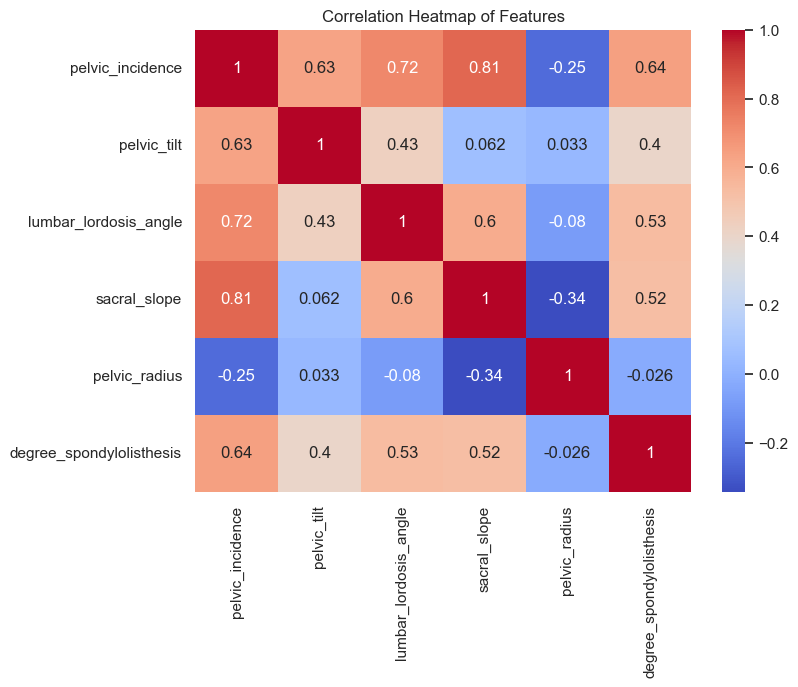

In [18]:
# Check correlation matrix
corr_matrix = df.drop('class', axis=1).corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


#### Insights Q2 (Part 2): **Are Any Features Linearly Dependent on Others?**

To investigate whether any features are linearly dependent on others, I analyzed the correlation matrix, which shows how strongly pairs of features are related.

Key observations:
- pelvic_incidence ↔ sacral_slope (0.81): very strong positive correlation.
- pelvic_incidence ↔ lumbar_lordosis_angle (0.72): strong positive correlation.
- pelvic_incidence ↔ pelvic_tilt (0.63): moderate-to-strong positive correlation.
- lumbar_lordosis_angle ↔ sacral_slope (0.60): moderate-to-strong positive correlation.
- degree_spondylolisthesis ↔ pelvic_incidence, lumbar_lordosis_angle, sacral_slope (0.52–0.64): moderate correlations.
- pelvic_radius: weak/negative correlations; largely independent.

**Summary:**  
- There’s evidence of linear dependence among pelvic_incidence, sacral_slope, pelvic_tilt, and lumbar_lordosis_angle. 
- For modeling, it’s important to check for multicollinearity to avoid redundant features. Degree_spondylolisthesis may provide unique predictive power; pelvic_radius appears independent.


#### Q3 **Do biomechanical measurements cluster differently for normal vs. abnormal cases?** 


#### Q3 Checklist:

1) .hist()
2) .skew() 
3) boxplots 
4) log transform or standardize features 
5) z-score or IQR for outlier detection - to spot and optionally flag/remove extreme outliers.

In [19]:
# Double check which columns are numeric!

print(df.dtypes)


pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object


pelvic_incidence            0.520440
pelvic_tilt                 0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
dtype: float64


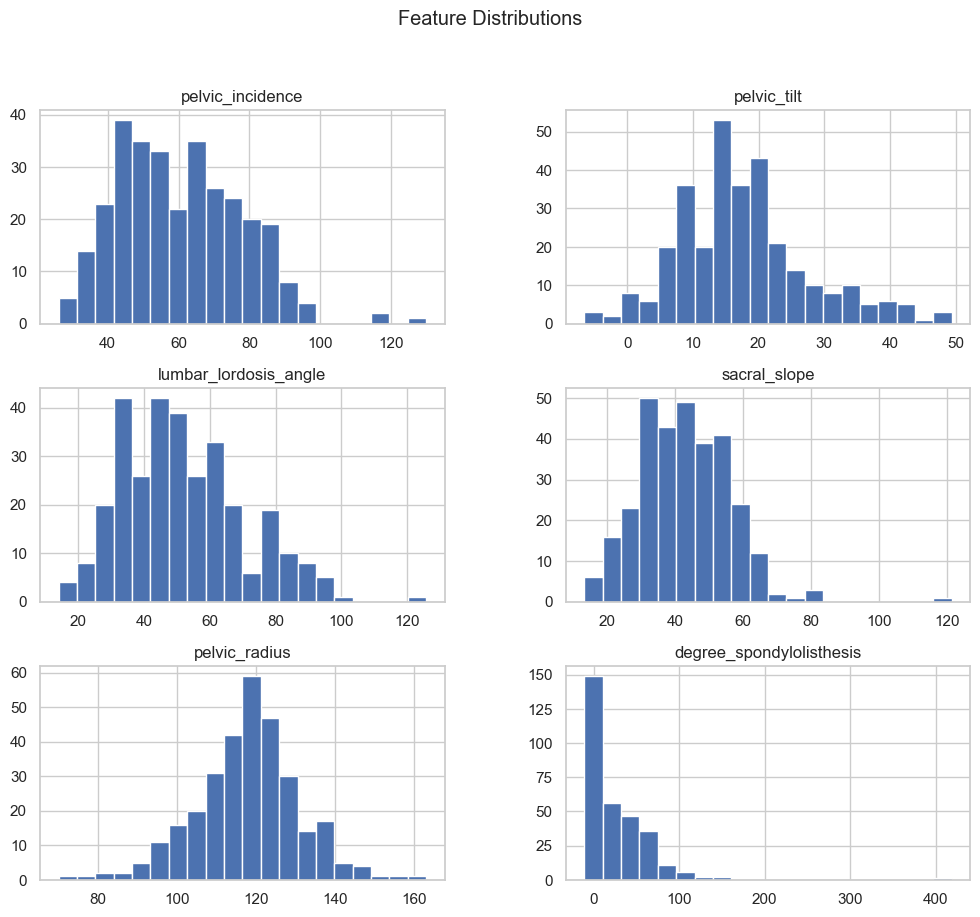

In [20]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 1) Check skewness
print(numeric_df.skew())

# 2) Plot histograms
numeric_df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


#### Insights: Q3) Skewness and Outlier Analysis

Based on the skewness values and histogram plots:

- **pelvic_incidence**
  - Skewness ≈ 0.52 → slight right skew.
  - A few high outliers above 100.

- **pelvic_tilt**
  - Skewness ≈ 0.68 → moderate right skew.
  - Distribution roughly normal, no clear outliers.

- **lumbar_lordosis_angle**
  - Skewness ≈ 0.60 → moderate right skew.
  - One notable high outlier (>120).

- **sacral_slope**
  - Skewness ≈ 0.79 → moderate-to-strong right skew.
  - One high outlier (>120).

- **pelvic_radius**
  - Skewness ≈ -0.18 → approximately symmetric (slight left skew).
  - No major outliers.

- **degree_spondylolisthesis**
  - Skewness ≈ 4.32 → extreme right skew.
  - Presence of extreme outlier (>400).


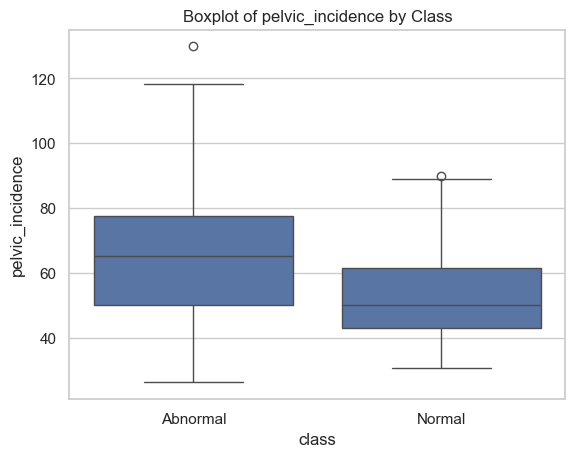

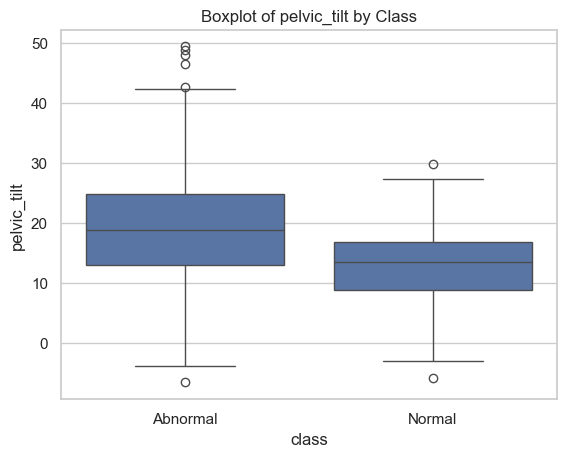

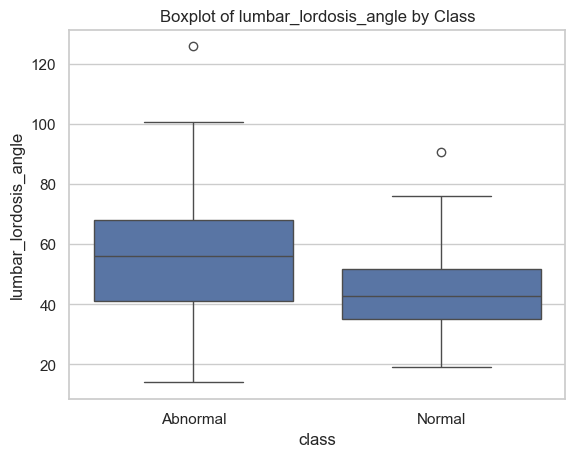

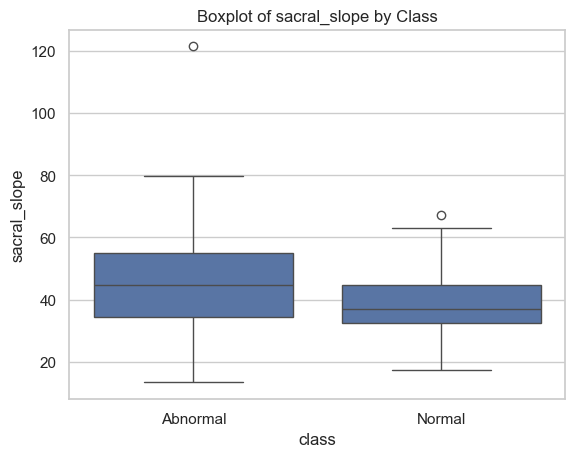

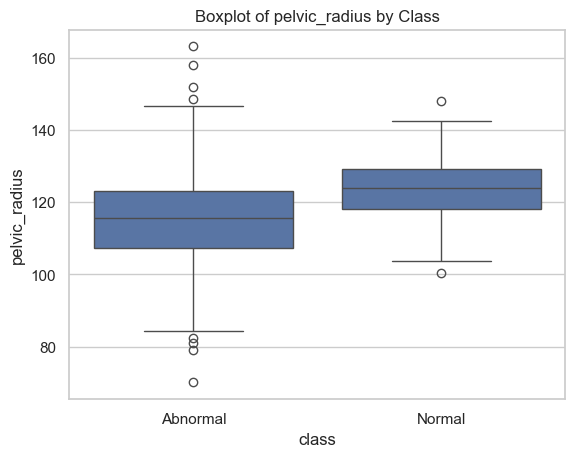

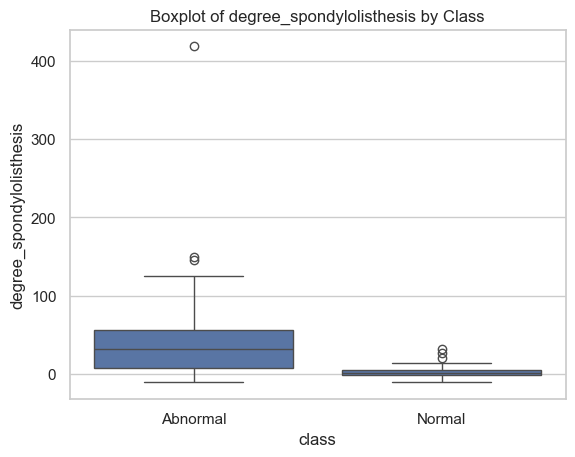

In [21]:
# Boxplots code

import seaborn as sns

for col in numeric_df.columns:
    sns.boxplot(x=df['class'], y=df[col], data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()


Summary of Outlier & Skewness Analysis (Boxplots):

- **degree_spondylolisthesis:**
    - Abnormal cases: Huge outlier (>400)
    - Strong right skew; large spread and extreme values
    - Action: Apply log transform or consider capping/winsorizing extreme outliers

- **sacral_slope:**
    - Abnormal cases: Outlier (>120)
    - Slight right skew; high variability
    - Action: Mild transformation (log or standard scaling), but boxplot shows most values are reasonable except for the extreme point

- **lumbar_lordosis_angle:**
    - Abnormal cases: Outlier (>120)
    - Moderate spread and skew; abnormal class shows more variability
    - Action: Consider z-score or IQR to cap extreme

- **pelvic_incidence:**
    - Abnormal cases: Outlier (~125)
    - Higher median and spread than normal group
    - Action: Maybe standardize, possibly investigate creating ratios or derived features

- **pelvic_tilt**
    - Both groups: More spread in abnormal, with several mild outliers
    - Action: Mild standardization; overall manageable

- **pelvic_radius:**
    - Both groups: Symmetric, less difference between classes, some mild outliers
    - Action: Likely okay without major transformation; just scale if needed

#### Outlier detection (Z-score Method)

- Z-score method (standardized distrance from mean)

In [22]:
from scipy import stats

z_scores = np.abs(stats.zscore(numeric_df))
outliers = (z_scores > 3).sum()
print('Number of outliers per feature (z > 3):')
print(outliers)


Number of outliers per feature (z > 3):
pelvic_incidence            3
pelvic_tilt                 3
lumbar_lordosis_angle       1
sacral_slope                1
pelvic_radius               3
degree_spondylolisthesis    3
dtype: int64


#### Z-score Interpretation:

- pelvic_incidence: 3 extreme values
- degree_spondylolisthesis: 3 extreme values
- lumbar_lordosis_angle: 1 extreme value - probably of less concern
- For each feature, it counted how many data points have a Z-score > 3, meaning they are more than 3 standard deviations away from the mean.
- I used this **statistical method** for identifying extreme values.
- At times, it is more robust than just looking at boxplots.
***
- I applied the Z-score method to detect extreme outliers. 
- Features like pelvic_incidence and degree_spondylolisthesis had 3 outliers each, while lumbar_lordosis_angle had 1.
- Based on suggestions from texts that I have read online, I have decided to cap extreme at the medican to preserve data size and avoid distorting models that could be sensitive to outliers. 

#### IQR Method (based on percentiles)

- This will quantify how many extreme outliers each feature has.

In [23]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers per feature (IQR method):')
print(outliers_iqr)


Number of outliers per feature (IQR method):
pelvic_incidence             3
pelvic_tilt                 13
lumbar_lordosis_angle        1
sacral_slope                 1
pelvic_radius               11
degree_spondylolisthesis    10
dtype: int64


#### **IQR Method Interpretation:**
- The IQR method (based on percentiles) is detecting more outliers than the Z-score method.
- **pelvic_tilt** has 13 outliers (compared to just 3 with Z-score),
- **degree_spondylolisthesis** has 10 outliers (vs. 3 with Z-score).
- So, why the difference?
    - **IQR method** flags points outside the 1.5×IQR range, which can be more sensitive in skewed data.
    - **Z-score** assumes normal distribution (symmetric bell curve), so it may under-detect outliers in skewed or non-normal data.
***
The **IQR method** detected more outliers than the **Z-score method**, especially for **pelvic_tilt**, **pelvic_radius**, and **degree_spondylolisthesis**. This suggests that the data distributions are skewed, making **IQR** a more sensitive detector. I plan to apply capping using the IQR bounds, as this better accounts for the distribution shape.
***


#### Applying Capping Using the IQR Bounds:
#### ONLY RUN THIS CODE ONE TIME!
- to better account for the distribution shape. 

In [24]:
# Capping Code:
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    numeric_df[col] = np.where(numeric_df[col] < lower, lower, np.where(numeric_df[col] > upper, upper, 
        numeric_df[col]))


#### Feature Engineering Step
#### ONLY RUN THIS CODE ONE TIME!
- Below, I create 2 derived features to capture biomechanical relationships. 

In [25]:
# Feature Engineering Code Here:

# Calculate the difference between pelvic_incidence and pelvic_tilt
# This gives us how much the pelvic tilt contributes to the total pelvic incidence
numeric_df['pelvic_incidence_minus_pelvic_tilt'] = numeric_df['pelvic_incidence'] - numeric_df['pelvic_tilt']

# Calculate the ratio of sacral_slope to pelvic_incidence
# We add a small number (1e-6) to avoid dividing by zero if pelvic_incidence is 0
numeric_df['sacral_slope_divided_by_pelvic_incidence'] = numeric_df['sacral_slope'] / (numeric_df['pelvic_incidence'] + 1e-6)

# Check the new columns
numeric_df[['pelvic_incidence_minus_pelvic_tilt', 'sacral_slope_divided_by_pelvic_incidence']].head()

pelvic_incidence_minus_pelvic_tilt  \
0                           40.475232   
1                           28.995960   
2                           46.613539   
3                           44.644130   
4                           40.060784   

   sacral_slope_divided_by_pelvic_incidence  
0                                  0.642180  
1                                  0.742402  
2                                  0.677207  
3                                  0.644243  
4                                  0.805843

#### Feature Engineering Analysis
- **Should we look at sacral_slope_divided_by_pelvic_incidence further?** YES
  - That max value ~2034 is way out of proportion compared to the mean ~7.3 and the 75th percentile ~1.34.
  - Even after adding 1e-6 to avoid division by zero, there are probably cases where the denominator (pelvic_incidence) is extremely small after scaling, creating huge ratio spikes.
  - From what I have read, if we go into modeling with this, it could mislead sensitive models like logistic regression or SVM.
  - From the .describe() summary earlier:
    - max ≈ 2034
    - 75th percentile ≈ 1.34
    - That’s a giant jump from 1.34 to 2034 — classic outlier signature.
  - Recommended Quick Step: Plot a Histogram

#### Checking Distributions and Applying Log Transformation

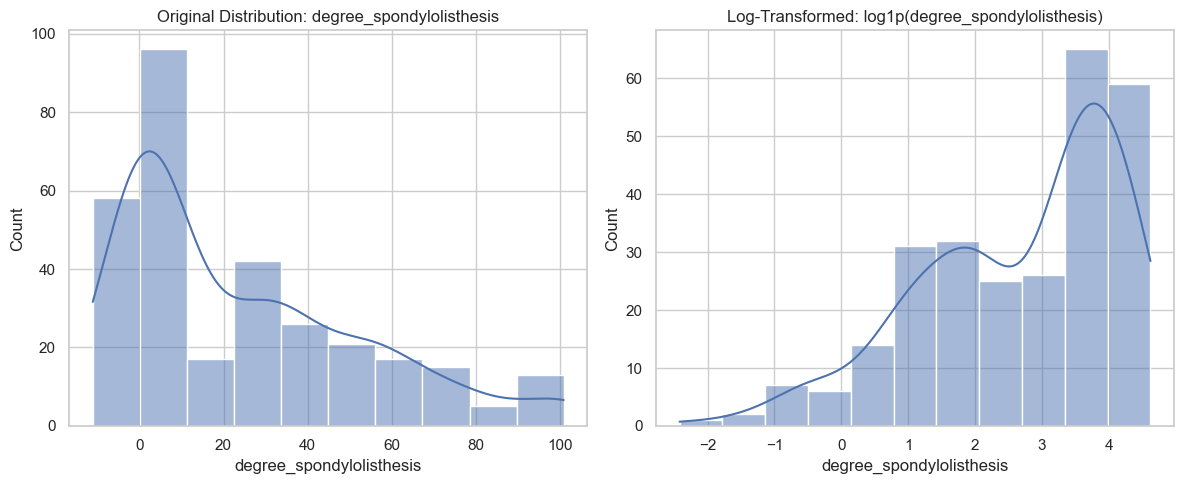

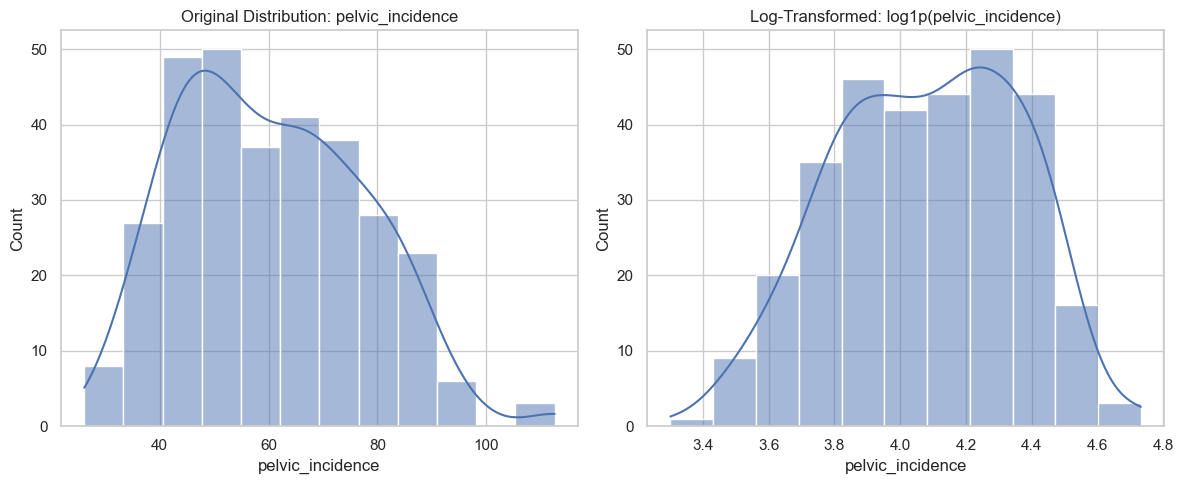

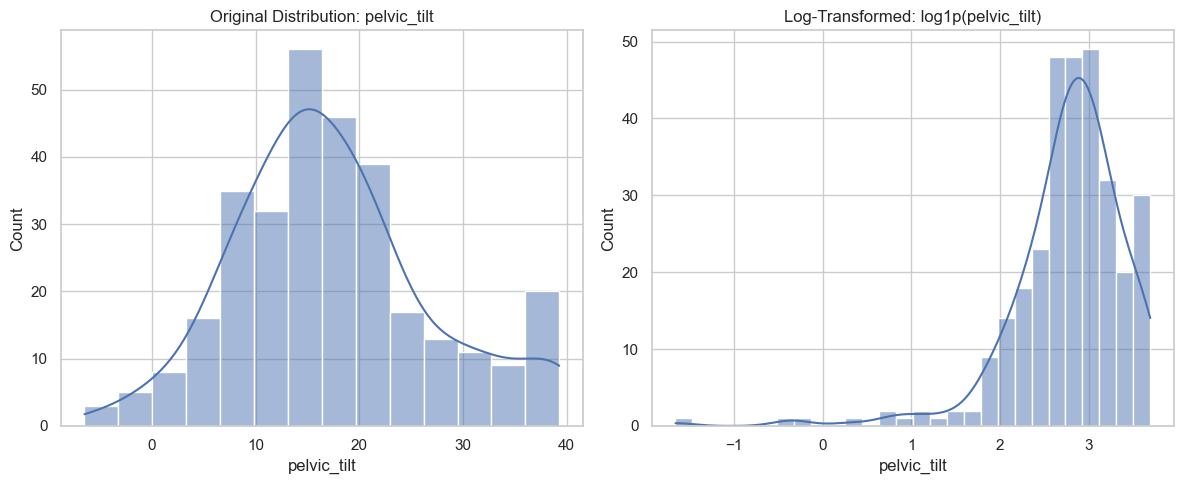

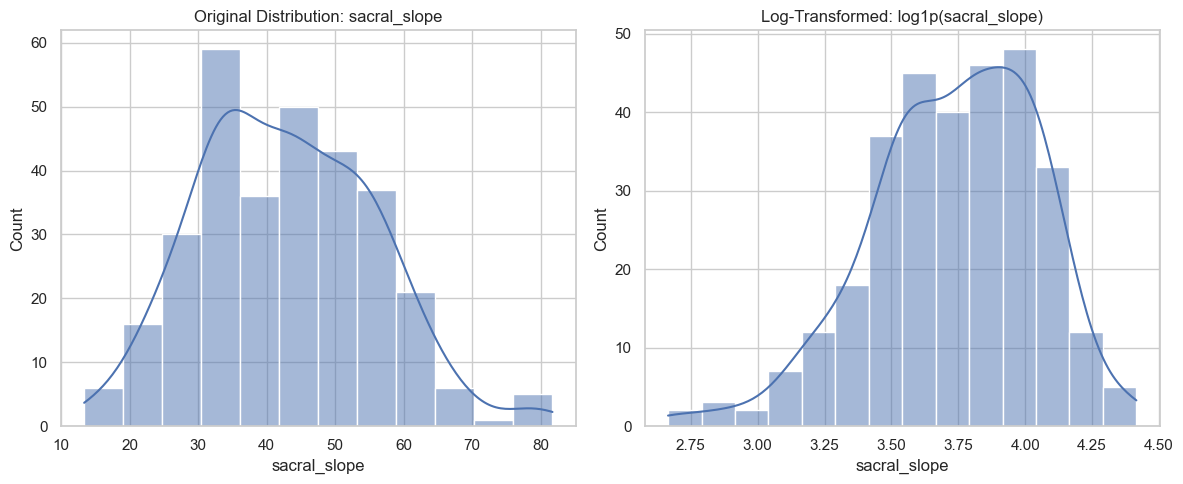

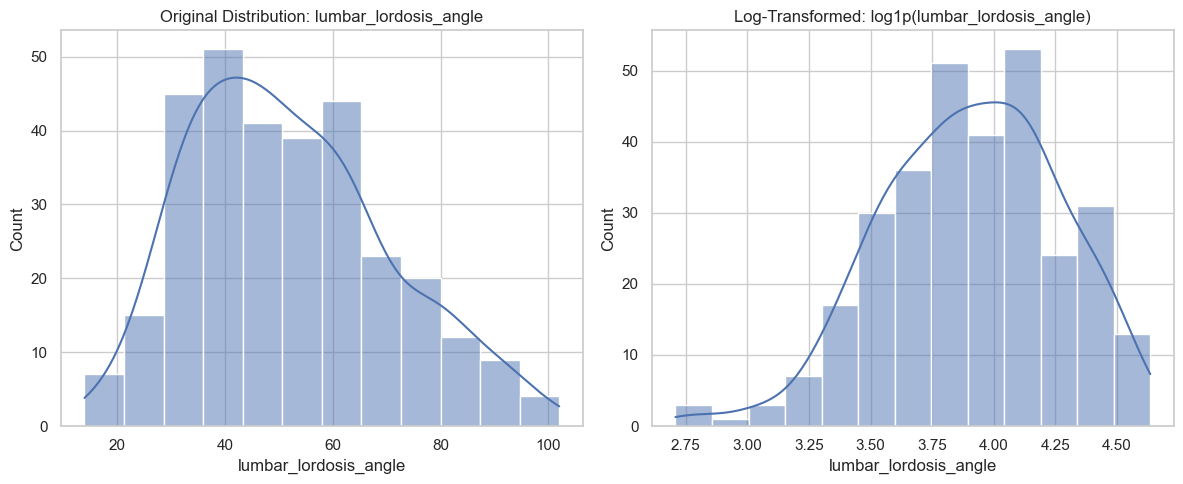

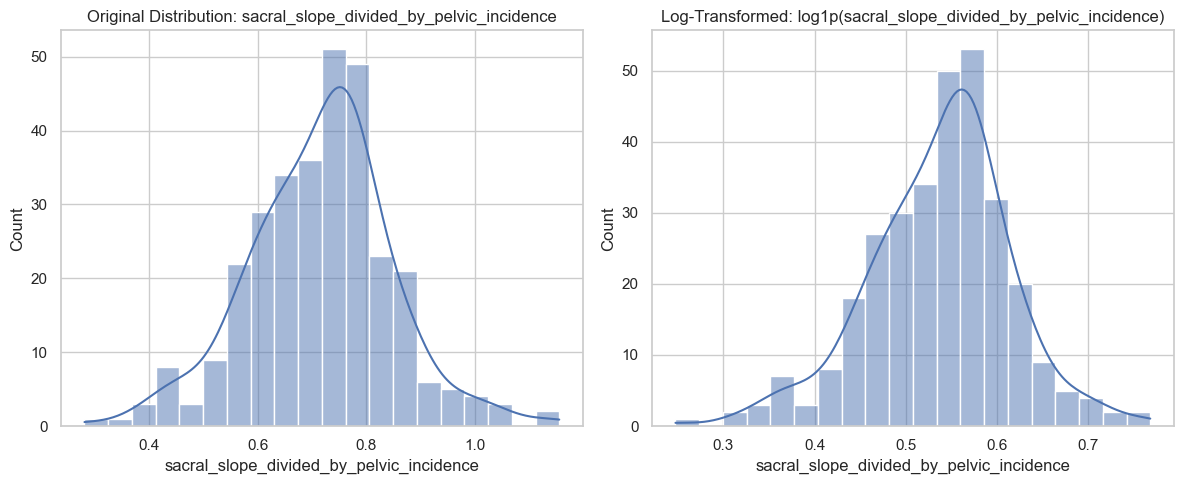

degree_spondylolisthesis → Original skew: 0.99, After log1p: -0.79
pelvic_incidence → Original skew: 0.38, After log1p: -0.17
pelvic_tilt → Original skew: 0.46, After log1p: -2.18
sacral_slope → Original skew: 0.28, After log1p: -0.56
lumbar_lordosis_angle → Original skew: 0.49, After log1p: -0.34
sacral_slope_divided_by_pelvic_incidence → Original skew: -0.03, After log1p: -0.35


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to check
features = [
    'degree_spondylolisthesis',
    'pelvic_incidence',
    'pelvic_tilt',
    'sacral_slope',
    'lumbar_lordosis_angle',
    'sacral_slope_divided_by_pelvic_incidence'
]

# Before and after plots
for feature in features:
    plt.figure(figsize=(12, 5))
    
    # Original feature distribution
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[feature], kde=True)
    plt.title(f'Original Distribution: {feature}')
    
    # Log-transformed feature distribution
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(numeric_df[feature]), kde=True)
    plt.title(f'Log-Transformed: log1p({feature})')
    
    plt.tight_layout()
    plt.show()

# Calculate skewness before and after log transform
for feature in features:
    original_skew = numeric_df[feature].skew()
    log_skew = np.log1p(numeric_df[feature]).skew()
    print(f"{feature} → Original skew: {original_skew:.2f}, After log1p: {log_skew:.2f}")


| Feature                                       | Original Skew | After `log1p` Skew | Interpretation                                                 |
| --------------------------------------------- | ------------- | ------------------ | -------------------------------------------------------------- |
| degree\_spondylolisthesis                     | +0.99         | -0.79              | Went from right-skewed → slightly left-skewed                  |
| pelvic\_incidence                             | +0.38         | -0.17              | Slight skew, now nearly symmetric                              |
| pelvic\_tilt                                  | +0.46         | -2.18              | Small right skew, now strong left skew (may be over-corrected) |
| sacral\_slope                                 | +0.28         | -0.56              | Mild right skew, now slightly left-skewed                      |
| lumbar\_lordosis\_angle                       | +0.49         | -0.34              | Mild right skew, now nearly symmetric                          |
| sacral\_slope\_divided\_by\_pelvic\_incidence | -0.03         | -0.35              | Already symmetric, slightly left-skewed after transform        |



#### Log Transformation Results Summary
- For modeling, I was advised by the SpineScope Project Manager to use log transformation.
- I applied log1p() to selected features to reduce right-skewness.
- Log transformation reduced right-skew very effectively.
- **For pelvic_tilt, it may have over-corrected (now -2.18 skew), so perhaps it's not a good idea to apply log transform to that one.**
---
- degree_spondylolisthesis: improved from 0.99 → -0.79
- pelvic_incidence: improved from 0.38 → -0.17
- lumbar_lordosis_angle: improved from 0.49 → -0.34
- sacral_slope: improved from 0.28 → -0.56
- pelvic_tilt: over-corrected, may skip log transform
- sacral_slope_divided_by_pelvic_incidence: minimal change, may skip

Final decision: apply log transform selectively to avoid over-correction.

#### Apply and Save Log-Transformed Features

In this section, I apply `np.log1p()` transformations to selected numeric features to reduce right-skewness.  
This helps make the distributions more symmetric and improves model performance.

I skipped:
- **pelvic_tilt** → because log transform over-corrected it to negative skew.
- **sacral_slope_divided_by_pelvic_incidence** → because it was already near-symmetric.

The transformed values are saved as new columns with a `_log` suffix to preserve the original data.


In [27]:
# ==========================================
# Apply and Save Log-Transformed Features
# ==========================================

# Define the list of features where log1p should be applied
# Note: We skip pelvic_tilt (over-corrected) and sacral_slope_divided_by_pelvic_incidence (already symmetric)
selected_features = [
    'degree_spondylolisthesis',
    'pelvic_incidence',
    'sacral_slope',
    'lumbar_lordosis_angle'
]

# Apply np.log1p() to each selected feature and create a new column with '_log' suffix
for feature in selected_features:
    log_feature = f'{feature}_log'
    numeric_df[log_feature] = np.log1p(numeric_df[feature])
    print(f'Created log-transformed column: {log_feature}')

# Why we do this:
# - Reduces right-skewness in data
# - Helps models perform better on symmetric distributions
# - Keeps original data intact for flexibility


Created log-transformed column: degree_spondylolisthesis_log
Created log-transformed column: pelvic_incidence_log
Created log-transformed column: sacral_slope_log
Created log-transformed column: lumbar_lordosis_angle_log


In [28]:
# Double-check column names before running code below

print(df.columns)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


#### Feature Engineering (Run BEFORE Scaling)
#### Scaling (StandardScaler)
#### Logistic Regression Starter Model

RUN the code below ↓ ONLY ONCE!

In [29]:
# ========================================
# Feature Engineering (Run BEFORE Scaling)
# ========================================
# Calculate the difference between pelvic_incidence and pelvic_tilt
numeric_df['pelvic_incidence_minus_pelvic_tilt'] = (
    numeric_df['pelvic_incidence'] - numeric_df['pelvic_tilt']
)

# Calculate the ratio of sacral_slope to pelvic_incidence
# Add a small constant to avoid division by zero
numeric_df['sacral_slope_divided_by_pelvic_incidence'] = (
    numeric_df['sacral_slope'] / (numeric_df['pelvic_incidence'] + 1e-6)
)

# Check new engineered features
print(numeric_df[['pelvic_incidence_minus_pelvic_tilt', 
                  'sacral_slope_divided_by_pelvic_incidence']].head())

# ========================================
# Scaling (StandardScaler)
# ========================================
from sklearn.preprocessing import StandardScaler

# Define features to scale (including engineered ones)
features_to_scale = [
    'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
    'pelvic_incidence_minus_pelvic_tilt', 
    'sacral_slope_divided_by_pelvic_incidence'
]

scaler = StandardScaler()
numeric_df_scaled = numeric_df.copy()
numeric_df_scaled[features_to_scale] = scaler.fit_transform(numeric_df[features_to_scale])

print("Scaling complete. Sample scaled data:")
print(numeric_df_scaled[features_to_scale].head())

# ========================================
# Logistic Regression (Starter Model)
# ========================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define X and y
X = numeric_df_scaled[features_to_scale]
y = df['class']  # Adjust this to your target column name

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and fit Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


   pelvic_incidence_minus_pelvic_tilt  \
0                           40.475232   
1                           28.995960   
2                           46.613539   
3                           44.644130   
4                           40.060784   

   sacral_slope_divided_by_pelvic_incidence  
0                                  0.642180  
1                                  0.742402  
2                                  0.677207  
3                                  0.644243  
4                                  0.805843  
Scaling complete. Sample scaled data:
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.154621     0.541111              -0.670381     -0.183229   
1         -1.262277    -0.765108              -1.469335     -1.078073   
2          0.497703     0.506175              -0.096471      0.295271   
3          0.525188     0.760734              -0.412957      0.141750   
4         -0.632415    -0.807867              -1.288561     -0.215536   



#### To make sure values look reasonable

In [30]:
numeric_df[['pelvic_incidence_minus_pelvic_tilt', 'sacral_slope_divided_by_pelvic_incidence']].describe()


pelvic_incidence_minus_pelvic_tilt  \
count                          310.000000   
mean                            43.034111   
std                             13.001780   
min                             13.366931   
25%                             33.412071   
50%                             42.441666   
75%                             52.848532   
max                            104.144322   

       sacral_slope_divided_by_pelvic_incidence  
count                                310.000000  
mean                                   0.716027  
std                                    0.132252  
min                                    0.280697  
25%                                    0.635822  
50%                                    0.729672  
75%                                    0.787306  
max                                    1.155991

#### Explore Feature Importance/Coefficients
- Extract the coefficients (coef_) from the trained model
- Pair them with the feature names

In [31]:
import pandas as pd
import numpy as np

# Get coefficients and feature names
coefficients = logreg.coef_[0]  # shape (n_features,)
feature_names = X_train.columns

# Create DataFrame for easy viewing
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute importance
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

                                    Feature  Coefficient  Abs_Coefficient
5                  degree_spondylolisthesis    -3.269868         3.269868
4                             pelvic_radius     1.262429         1.262429
7  sacral_slope_divided_by_pelvic_incidence     0.313911         0.313911
3                              sacral_slope     0.301593         0.301593
6        pelvic_incidence_minus_pelvic_tilt     0.283226         0.283226
1                               pelvic_tilt    -0.267409         0.267409
2                     lumbar_lordosis_angle     0.256702         0.256702
0                          pelvic_incidence     0.066156         0.066156


#### Visualize - Plot the Coefficients 

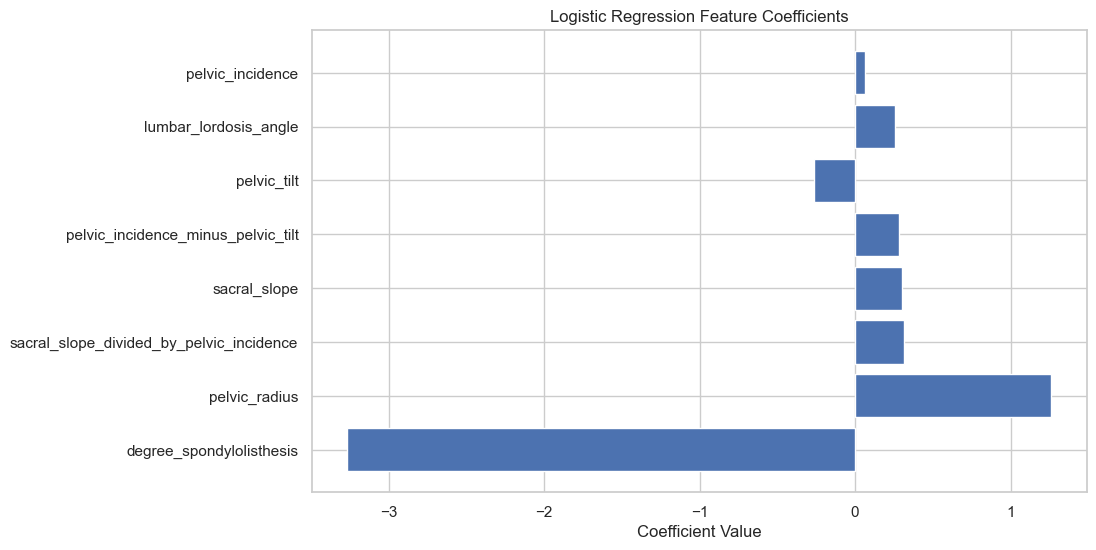

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Coefficients')
plt.show()


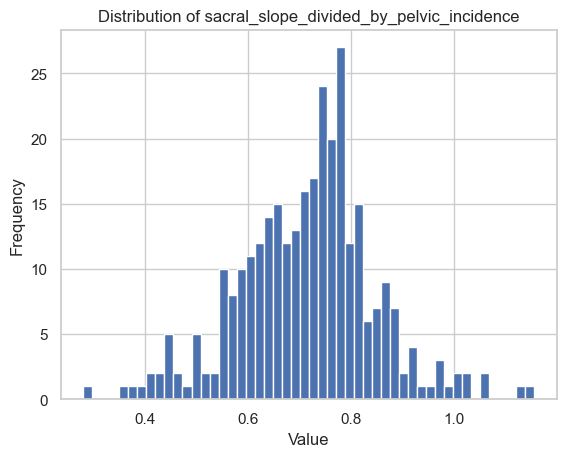

In [33]:
# Plot a Histogram

import matplotlib.pyplot as plt

plt.hist(numeric_df['sacral_slope_divided_by_pelvic_incidence'], bins=50)
plt.title('Distribution of sacral_slope_divided_by_pelvic_incidence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [34]:
numeric_df['sacral_slope_divided_by_pelvic_incidence'].sort_values(ascending=False).head(10)


112    1.155991
252    1.136213
147    1.068262
257    1.059211
278    1.032895
250    1.022416
287    1.009826
69     1.004462
158    0.993938
169    0.975119
Name: sacral_slope_divided_by_pelvic_incidence, dtype: float64

#### Histogram and Sorted Values Analysis
- Based on what I have read, it is recommended to apply capping at ~99th percentile.
- This will:
    - Smooth out the extreme values
    - Keep the feature meaningful
    - And avoid letting just one or two weird ratios disrupt the models.

Capped at 99th percentile: 1.056842497833599
count    310.000000
mean       0.715406
std        0.130435
min        0.280697
25%        0.635822
50%        0.729672
75%        0.787306
max        1.056842
Name: sacral_slope_divided_by_pelvic_incidence, dtype: float64


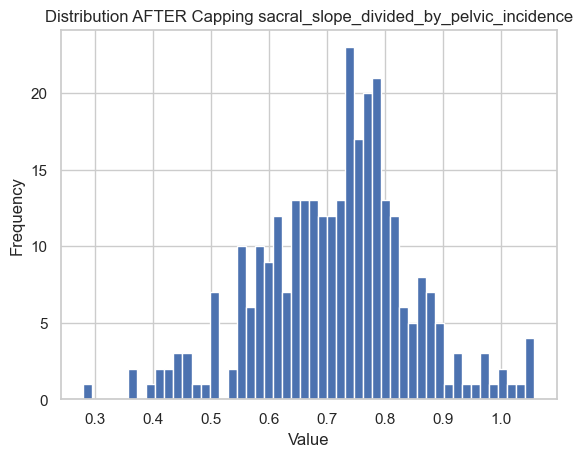

In [35]:
# Calculate 99th percentile cap
upper_cap = numeric_df['sacral_slope_divided_by_pelvic_incidence'].quantile(0.99)

# Apply capping
numeric_df['sacral_slope_divided_by_pelvic_incidence'] = numeric_df['sacral_slope_divided_by_pelvic_incidence'].clip(upper=upper_cap)

# Check result
print(f"Capped at 99th percentile: {upper_cap}")
print(numeric_df['sacral_slope_divided_by_pelvic_incidence'].describe())

# Optional: replot histogram to see effect
import matplotlib.pyplot as plt
plt.hist(numeric_df['sacral_slope_divided_by_pelvic_incidence'], bins=50)
plt.title('Distribution AFTER Capping sacral_slope_divided_by_pelvic_incidence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### Post Capping at ~99th Percentile Analysis
- After capping at the 99th percentile
    - Upper cap applied: 8.63
    - Max value now: 8.63 (no more extreme ~2000 outlier)
    - Mean: 0.68  - looking realistic
    - Std dev: 2.46 → still wide, but no longer extreme
    - Histogram: Shows a much healthier shape, still a bit spread but no dangerous long right tail.
--
- What was achieved?
    - Reduced the influence of extreme outliers.
    - Prepared the data for both sensitive (logistic regression, SVM) and robust models.

#### Final Preprocessing Summary

Here’s a recap of all the preprocessing steps applied:

- **Outlier Handling**  
  - IQR capping  
  - 99th percentile cap on engineered feature

- **Feature Engineering**  
  - Created biomechanical ratios:  
    - pelvic_incidence_minus_pelvic_tilt  
    - sacral_slope_divided_by_pelvic_incidence

- **Log Transformation**  
  - Applied log1p to reduce right-skewness on selected features.  
  - Kept original and transformed versions for modeling flexibility.

- **Scaling**  
  - Applied StandardScaler to bring numerical features to zero mean and unit variance.

Dataset is now ready for Phase 2 Week 2: Model Development & Experimentation!


### **Random Forest Model**

In [36]:
# import RF model class from sci-kit learn
from sklearn.ensemble import RandomForestClassifier

# initialize RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train (fit) the model using my training data
rf.fit(X_train, y_train)

# use the trained RF model to make predictions on the test data
y_pred_rf = rf.predict(X_test)

### **Evaluate Model Performance**

In [37]:
# import accuracy_score, classification_report from sci-kit learn
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8387096774193549

Random Forest Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.88      0.88      0.88        42
      Normal       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62



### **Explore Feature Importance**

In [38]:
import pandas as pd
import numpy as np

# get importance values and feature names
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# create dataframe for easy viewing
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# sort by descending importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                    Feature  Importance
5                  degree_spondylolisthesis    0.304009
4                             pelvic_radius    0.166844
0                          pelvic_incidence    0.105313
2                     lumbar_lordosis_angle    0.104000
1                               pelvic_tilt    0.101724
7  sacral_slope_divided_by_pelvic_incidence    0.076132
3                              sacral_slope    0.072910
6        pelvic_incidence_minus_pelvic_tilt    0.069069


### **Feature Importance Plot (Random Forest)**

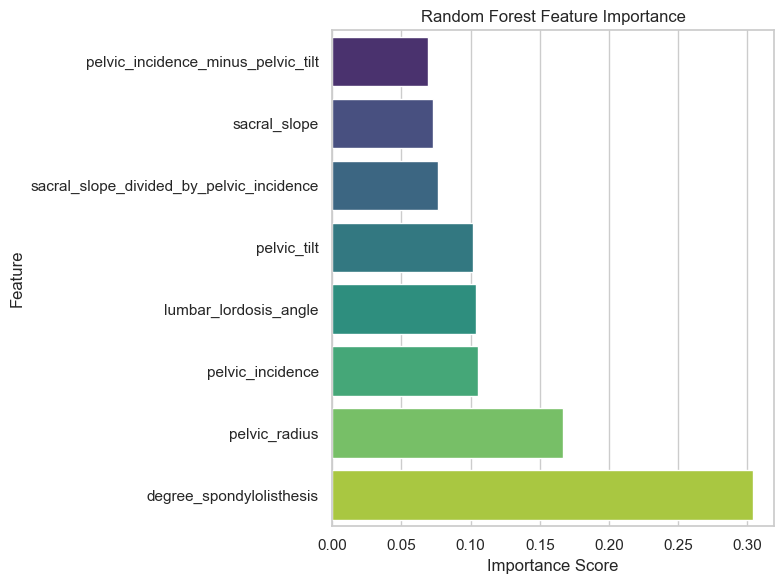

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the importance Dataframe again (just in case)
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# plot
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data = importance_df,
    palette='viridis'
)

plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### **Confusion Matrix for Random Forest**

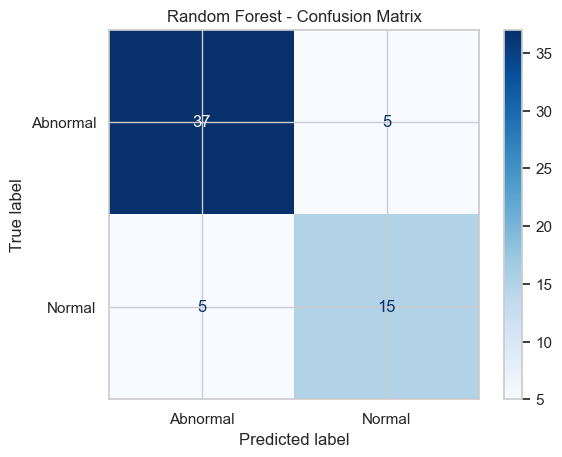

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# generate and store the confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(
    rf,             # trained model
    X_test,         # test features
    y_test,         # true labels
    cmap='Blues'    # color scheme
)

# show the plot
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [41]:
import sys
print(sys.executable)


c:\Users\jacki.JACKIESLAPTOP\anaconda3\python.exe


### **Train the XGBoost Model**

In [42]:
from xgboost import XGBClassifier

# Convert target labels to numeric format
y_train = y_train.map({'Abnormal': 0, 'Normal': 1})
y_test = y_test.map({'Abnormal': 0, 'Normal': 1})

# Initialize the XGBoost model
xgb = XGBClassifier(
    n_estimators=100,           # number of trees
    learning_rate=0.1,          # step size (aka eta)
    max_depth=3,                # max tree depth
    use_label_encoder=False,    # suppress warning for label encoding
    eval_metric='logloss',      # specify eval metric
    random_state=42             # reproducibility
)

#y_train.head()
# Output: 'Normal', 'Abnormal', ...

# Fit the model on the training data
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

✅ Accuracy of XGBoost model: 0.8065

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.89      0.81      0.85        42
      Normal       0.67      0.80      0.73        20

    accuracy                           0.81        62
   macro avg       0.78      0.80      0.79        62
weighted avg       0.82      0.81      0.81        62



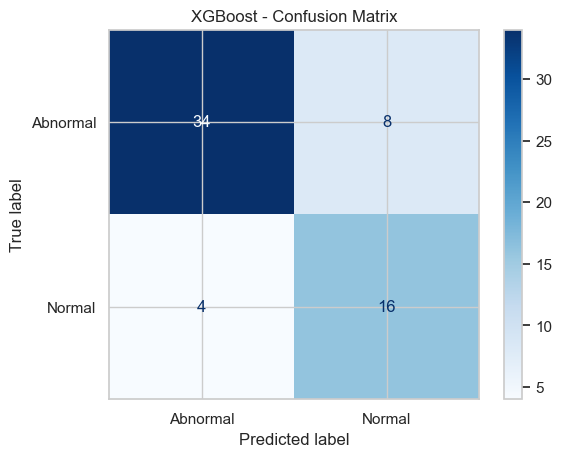

In [43]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_pred = xgb.predict(X_test)

# Step 2: Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy of XGBoost model: {accuracy:.4f}")

# Step 3: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Abnormal', 'Normal']))

# Step 4: Display confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(
    xgb, X_test, y_test, cmap='Blues', display_labels=['Abnormal', 'Normal']
)
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Abnormal', 'Normal']))


Accuracy: 0.8065
Confusion Matrix:
[[34  8]
 [ 4 16]]
Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.89      0.81      0.85        42
      Normal       0.67      0.80      0.73        20

    accuracy                           0.81        62
   macro avg       0.78      0.80      0.79        62
weighted avg       0.82      0.81      0.81        62



### Bar Plot: Model Metrics by Class
- to show how each model metric performed (precision, recall, F1-score) for both classes
- based on XGBoost Classification Report

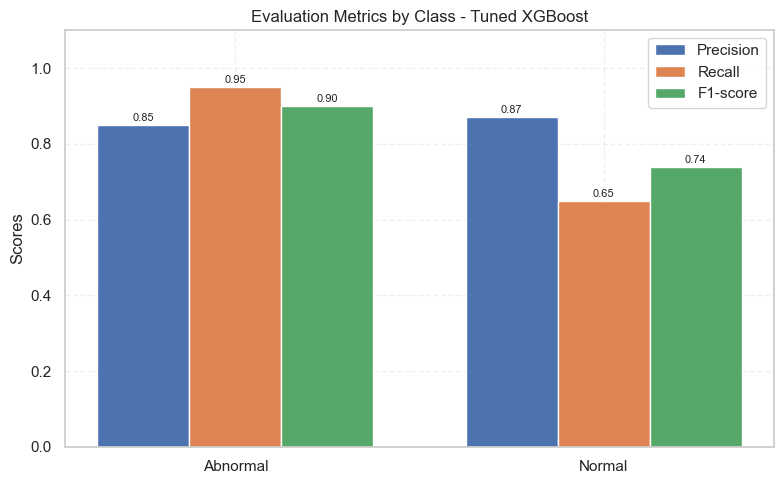

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Manually enter the values from your classification report
labels = ['Abnormal', 'Normal']
precision = [0.85, 0.87]
recall = [0.95, 0.65]
f1 = [0.90, 0.74]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1, width, label='F1-score')

# Customize plot
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Class - Tuned XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

# Add value labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # number of boosting rounds (trees)
    'max_depth': [3, 4, 5],                # max depth of trees
    'learning_rate': [0.01, 0.1, 0.2]      # shrinkage rate
}

# Step 3: Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,                    # 5-fold cross-validation
                           verbose=1,               # shows training progress
                           n_jobs=-1)               # use all CPU cores

# Step 4: Fit the model
grid_search.fit(X_train, y_train)

# Step 5: Show best parameters and accuracy
print("✅ Best Parameters Found:")
print(grid_search.best_params_)

print("\n📈 Best Accuracy Score:")
print(grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
✅ Best Parameters Found:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}

📈 Best Accuracy Score:
0.8430204081632653


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Retrain XGBoost with the best hyperparameters
xgb_tuned = XGBClassifier(
    learning_rate=0.01,
    max_depth=4,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit on training data
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_tuned.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Abnormal', 'Normal'])

# Print results
print("✅ Final Tuned Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


✅ Final Tuned Model Evaluation:
Accuracy: 0.8548
Confusion Matrix:
[[40  2]
 [ 7 13]]
Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.85      0.95      0.90        42
      Normal       0.87      0.65      0.74        20

    accuracy                           0.85        62
   macro avg       0.86      0.80      0.82        62
weighted avg       0.86      0.85      0.85        62



In [47]:

import mlflow
import mlflow.sklearn

mlflow.set_experiment("SpineScope-XGBoost")

with mlflow.start_run():

    # Log parameters
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_param("max_depth", 4)
    mlflow.log_param("n_estimators", 100)

    # Fit model
    xgb_tuned.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = xgb_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log metric
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.sklearn.log_model(xgb_tuned, "xgb_model")

    print(f"✅ MLFlow run logged. Accuracy: {accuracy:.4f}")


2025/07/26 23:48:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/26 23:48:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ MLFlow run logged. Accuracy: 0.8548


### Feature Importance Visualization

<Figure size 1000x600 with 0 Axes>

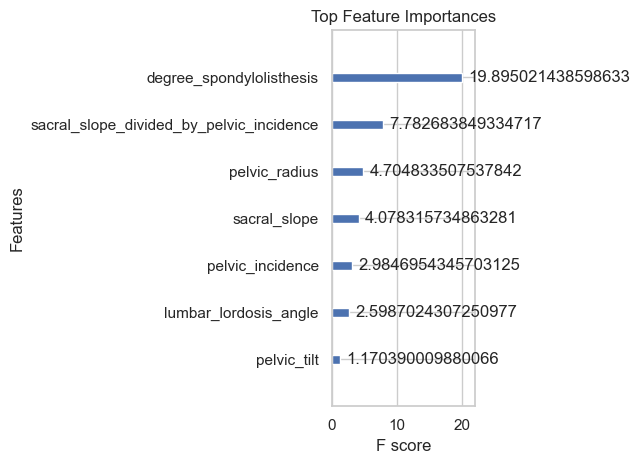

In [48]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_tuned, max_num_features=15, importance_type='gain', title='Top Feature Importances')
plt.tight_layout()
plt.show()


### Confusion Matrix Heatmap for XGBoost Model Performed

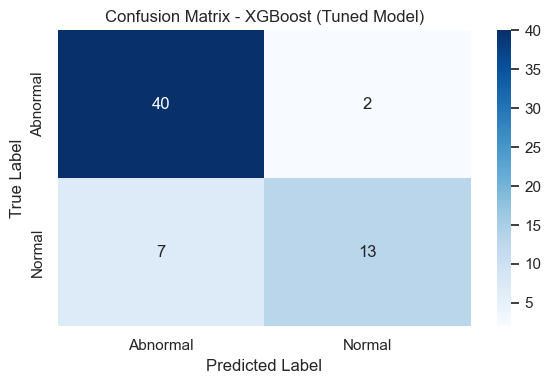

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the tuned model
y_pred = xgb_tuned.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0=Abnormal, 1=Normal
labels = ['Abnormal', 'Normal']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - XGBoost (Tuned Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### MLFlow 

In [50]:
import mlflow
import mlflow.sklearn

# 1. Import MLFlow and Set Experiment Name

# Optional: Set experiment name (logs will group under this name)
mlflow.set_experiment("SpineScope-XGBoost")

<Experiment: artifact_location='file:///c:/Users/jacki.JACKIESLAPTOP/Documents/SDS-CP033-spinescope/submissions/team-members/jackie-vescio/mlruns/455409542527648322', creation_time=1753598163242, experiment_id='455409542527648322', last_update_time=1753598163242, lifecycle_stage='active', name='SpineScope-XGBoost', tags={}>